In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions  

In [4]:
data_dir_test = "/content/drive/MyDrive/train"

In [5]:
img_height,img_width=512,512
batch_size=8
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=42,
  color_mode = 'grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 542 files belonging to 6 classes.


In [6]:
data_dir_val = "/content/drive/MyDrive/test"

In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_val,
  seed=42,
  color_mode = 'grayscale',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 110 files belonging to 6 classes.


In [8]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(512,512,1),
                   pooling='max',classes=6,
                   weights=None)
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [9]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(6, activation='softmax'))

In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23581440  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 6)                 1542      
                                                                 
Total params: 24,763,398
Trainable params: 1,181,958
Non-trainable params: 23,581,440
_________________________________________________________________


In [11]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [17]:
history = resnet_model.fit(train_ds, validation_data = val_ds, epochs=25)

Epoch 1/25
68/68 [==============================] - 11s 153ms/step - loss: 1.7251 - accuracy: 0.2749 - val_loss: 1.6878 - val_accuracy: 0.3182
Epoch 2/25
68/68 [==============================] - 10s 151ms/step - loss: 1.7251 - accuracy: 0.2749 - val_loss: 1.6886 - val_accuracy: 0.3182
Epoch 3/25
68/68 [==============================] - 10s 152ms/step - loss: 1.7253 - accuracy: 0.2749 - val_loss: 1.6872 - val_accuracy: 0.3182
Epoch 4/25
68/68 [==============================] - 10s 151ms/step - loss: 1.7255 - accuracy: 0.2749 - val_loss: 1.6886 - val_accuracy: 0.3182
Epoch 5/25
68/68 [==============================] - 10s 150ms/step - loss: 1.7255 - accuracy: 0.2749 - val_loss: 1.6883 - val_accuracy: 0.3182
Epoch 6/25
68/68 [==============================] - 10s 149ms/step - loss: 1.7252 - accuracy: 0.2749 - val_loss: 1.6886 - val_accuracy: 0.3182
Epoch 7/25
68/68 [==============================] - 10s 149ms/step - loss: 1.7258 - accuracy: 0.2749 - val_loss: 1.6877 - val_accuracy: 0.3182

In [19]:
values = pd.DataFrame(resnet_model.history.history)

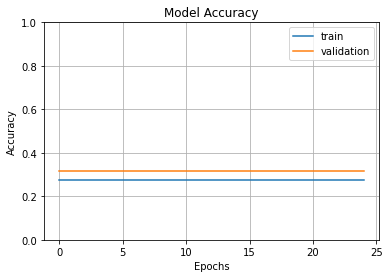

In [20]:
fig1 = plt.gcf()
plt.plot(values['accuracy'])
plt.plot(values['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.ylim(0,1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

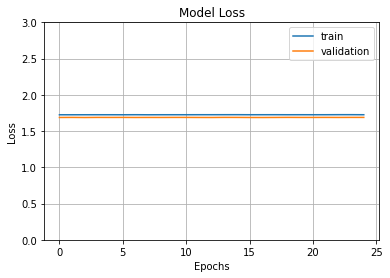

In [21]:
fig1 = plt.gcf()
plt.plot(values['loss'])
plt.plot(values['val_loss'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.ylim(0,3)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()